# Mengimpor Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Memuat Data

In [2]:
# Baca file CSV dari URL
data = pd.read_csv('/content/Barcelona stats24-25.csv', sep=";")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,Date,Time,Comp,Round,Day 4,venue,Result,GF,GA,Oponent,xG,xGA,Poss,Attendance,Captain,Formation,Opp_Formation,Referee
0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,Valencia,3.2,1.0,63.0,"46,673",Marc-André ter Stegen,4-2-3-1,4-4-2,NaN
1,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,Athletic Club,1.8,1.0,64.0,"46,448",Marc-André ter Stegen,4-2-3-1,4-2-3-1,NaN
2,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,Rayo Vallecano,1.4,0.4,64.0,"14,031",Marc-André ter Stegen,4-2-3-1,4-4-2,NaN
3,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,Valladolid,4.7,0.5,70.0,"44,359",Marc-André ter Stegen,4-3-3,4-1-4-1,Isidro Díaz de Mera
4,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,Girona,1.9,1.3,55.0,"13,891",Marc-André ter Stegen,4-2-3-1,4-2-3-1,Alejandro Muñíz


In [3]:
print("informasi Dataset:")
data.info()

informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           60 non-null     object 
 1   Time           58 non-null     object 
 2   Comp           60 non-null     object 
 3   Round          60 non-null     object 
 4   Day 4          60 non-null     object 
 5   venue          60 non-null     object 
 6   Result         53 non-null     object 
 7   GF             53 non-null     float64
 8   GA             53 non-null     float64
 9   Oponent        60 non-null     object 
 10  xG             45 non-null     float64
 11  xGA            45 non-null     float64
 12  Poss           53 non-null     float64
 13  Attendance     52 non-null     object 
 14  Captain        53 non-null     object 
 15  Formation      53 non-null     object 
 16  Opp_Formation  53 non-null     object 
 17  Referee        50 non-null     object

In [4]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Date              0
Time              2
Comp              0
Round             0
Day 4             0
venue             0
Result            7
GF                7
GA                7
Oponent           0
xG               15
xGA              15
Poss              7
Attendance        8
Captain           7
Formation         7
Opp_Formation     7
Referee          10
dtype: int64


In [5]:
# Hapus kolom yang tidak berkontribusi untuk prediksi
data = data.drop(columns=['Date', 'Time', 'Day 4', 'xG\xa0', 'xGA\xa0', 'Attendance', 'Captain', 'Formation', 'Opp_Formation', 'Referee'])

# Tampilkan DataFrame untuk memastikan kolom telah dihapus
data.head()

,Comp,Round,venue,Result,GF,GA,Oponent,Poss
0,La Liga,Matchweek 1,Away,W,2.0,1.0,Valencia,63.0
1,La Liga,Matchweek 2,Home,W,2.0,1.0,Athletic Club,64.0
2,La Liga,Matchweek 3,Away,W,2.0,1.0,Rayo Vallecano,64.0
3,La Liga,Matchweek 4,Home,W,7.0,0.0,Valladolid,70.0
4,La Liga,Matchweek 5,Away,W,4.0,1.0,Girona,55.0


In [6]:
# Menangani Nilai Numerik yang Hilang
# Mengisi NaN di kolom numerik dengan nilai rata-ratanya
numeric_columns = ['GF', 'GA', 'Poss']

for column in numeric_columns:
  rata_rata = data[column].mean()

  data[column].fillna(rata_rata, inplace=True)

print("Semua nilai NaN pada kolom numerik telah diisi.")

Semua nilai NaN pada kolom numerik telah diisi.


/tmp/ipython-input-6-2253517708.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(rata_rata, inplace=True)


In [7]:
# Menangani Nilai Kategorikal yang Hilang
# Mengisi NaN di kolom kategorikal dengan nilai modus
modus = data['Result'].mode()[0]
data['Result'].fillna(modus, inplace=True)

print("Semua nilai NaN pada kolom kategorikal telah diisi.")

Semua nilai NaN pada kolom kategorikal telah diisi.


/tmp/ipython-input-7-2800103297.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Result'].fillna(modus, inplace=True)


In [8]:
# Cek missing values
print("\nMissing values per fitur:")
print(data.isnull().sum())


Missing values per fitur:
Comp       0
Round      0
venue      0
Result     0
GF         0
GA         0
Oponent    0
Poss       0
dtype: int64


# Exploratory Data Analysis

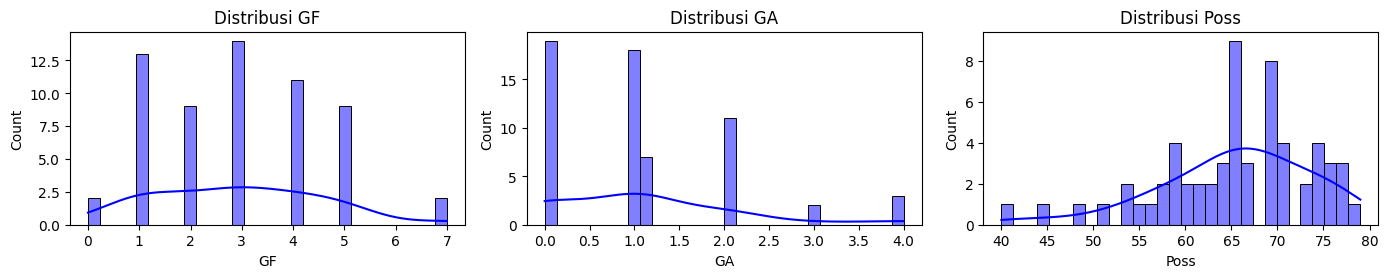

In [9]:
# Distribusi fitur numerik
num_features = data.select_dtypes(include=[np.number]) #memilih kolom yang berisi data numerik
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

/tmp/ipython-input-10-4045829659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipython-input-10-4045829659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipython-input-10-4045829659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipython-input-10-4045829659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and 

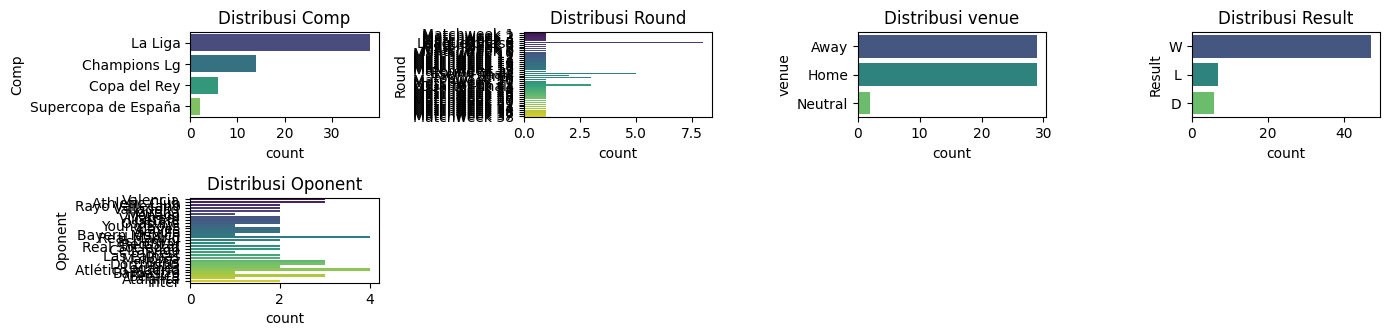

In [10]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object]) #memilih kolom yang berisi data object
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(5, 4, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show();

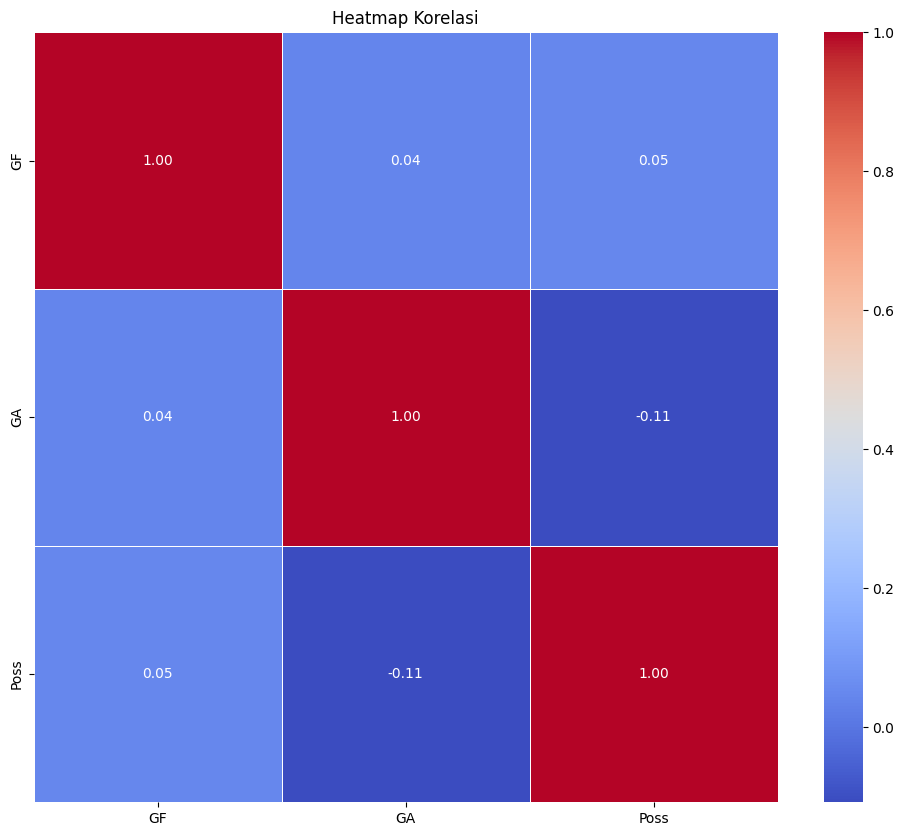

In [11]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

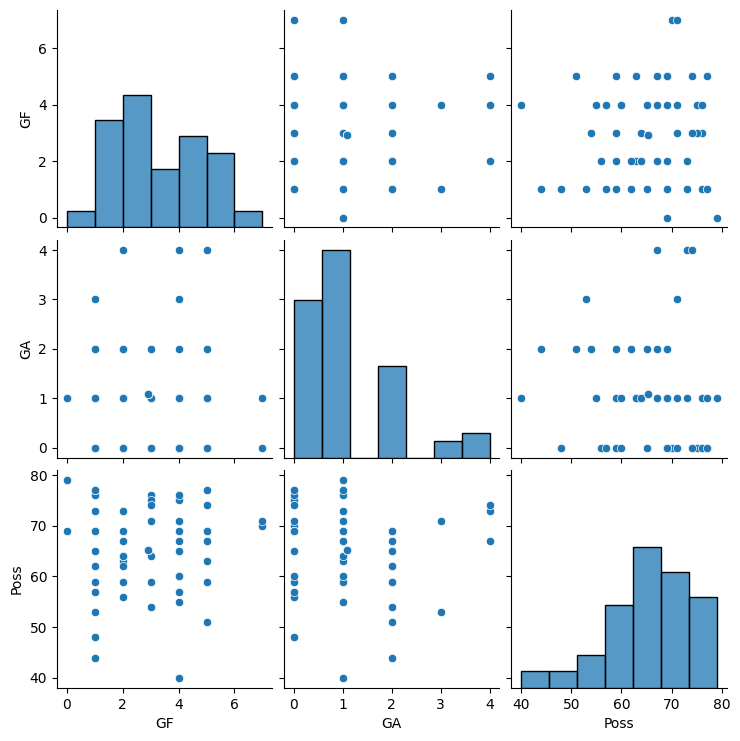

In [12]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

/tmp/ipython-input-13-2710119745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Result', data=data, palette='viridis')


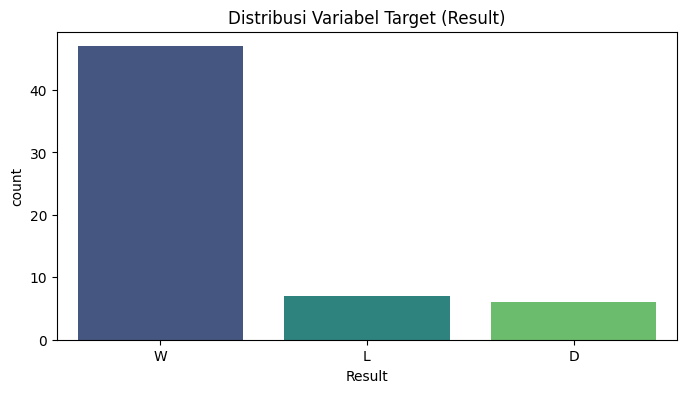

In [13]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Result', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Result)')
plt.show()

/tmp/ipython-input-14-2015777456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=column, data=data, palette='viridis')
/tmp/ipython-input-14-2015777456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=column, data=data, palette='viridis')
/tmp/ipython-input-14-2015777456.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Result', y=column, data=data, palette='viridis')


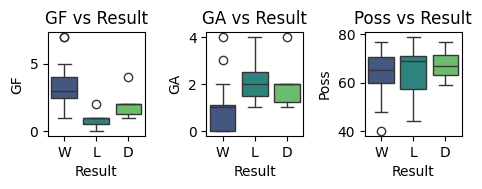

In [14]:
# Fitur numerik vs Target
for i, column in enumerate(num_features.columns, 1):
     if column != 'Result':
         plt.subplot(3, 4, i)
         sns.boxplot(x='Result', y=column, data=data, palette='viridis')
         plt.title(f'{column} vs Result')

plt.tight_layout()
plt.show()

# Label Encoder

In [15]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['Comp', 'Round', 'venue', 'Result', 'Oponent']

# Encode kolom kategorikal
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
data.head()

,Comp,Round,venue,Result,GF,GA,Oponent,Poss
0,2,2,0,2,2.0,1.0,25,63.0
1,2,13,1,2,2.0,1.0,2,64.0
2,2,24,0,2,2.0,1.0,20,64.0
3,2,34,1,2,7.0,0.0,26,70.0
4,2,35,0,2,4.0,1.0,13,55.0


In [16]:
y = data['Result']
unique_labels = np.unique(y)
print("Unique labels in 'Result' column:", unique_labels)

Unique labels in 'Result' column: [0 1 2]


# Data Splitting

In [17]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data['Result'] = data['Result'].map({0: 0, 0.5: 1, 1: 2})

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Result'])
y = data['Result']

# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(48, 7), y_train=(48,)
Test set shape: X_test=(12, 7), y_test=(12,)


In [18]:
y = data['Result']
unique_labels = np.unique(y)
print("Unique labels in 'Result' column:", unique_labels)

Unique labels in 'Result' column: [0 1 2]


# Model Deployment

In [19]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


# Model Evaluation

==== KNN Classifier ====
Confusion Matrix:
[[ 0  0  1]
 [ 0  0  1]
 [ 0  0 10]]
Accuracy: 0.8333
Precision: 0.2778
Recall: 0.3333
F1-Score: 0.3030

----------------------------------------



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


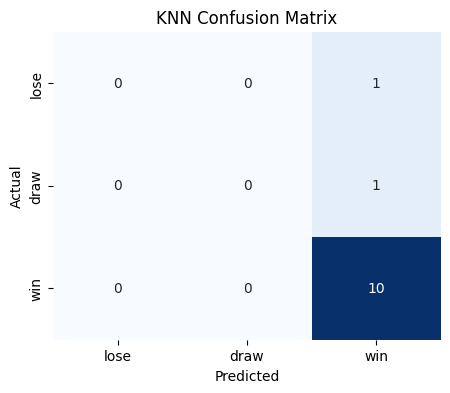

In [20]:
# K-Nearest Neighbors (KNN)
y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=[0, 1, 2])
print("==== KNN Classifier ====")
print("Confusion Matrix:")
print(cm_knn)
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_knn, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["lose","draw","win"], yticklabels=["lose","draw","win"])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Decision Tree Classifier ====
Confusion Matrix:
[[0 1 0]
 [0 1 0]
 [1 0 9]]
Accuracy: 0.8333
Precision: 0.5000
Recall: 0.6333
F1-Score: 0.5380

----------------------------------------



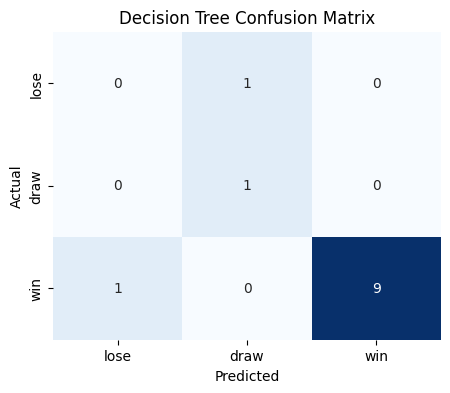

In [21]:
# Decision Tree (DT)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt, labels=[0, 1, 2])
print("==== Decision Tree Classifier ====")
print("Confusion Matrix:")
print(cm_dt)
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='macro'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["lose","draw","win"], yticklabels=["lose","draw","win"])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


==== Random Forest Classifier ====
Confusion Matrix:
[[ 0  0  1]
 [ 0  1  0]
 [ 0  0 10]]
Accuracy: 0.9167
Precision (macro): 0.6364
Recall (macro): 0.6667
F1-Score (macro): 0.6508

----------------------------------------



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


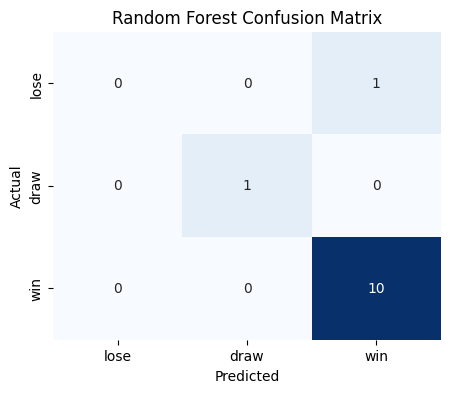

In [22]:
# Random Forest (RF)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=[0, 1, 2])
print("==== Random Forest Classifier ====")
print("Confusion Matrix:")
print(cm_rf)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_rf, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_rf, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["lose","draw","win"], yticklabels=["lose","draw","win"])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== SVM Classifier ====
Confusion Matrix:
[[ 0  0  1]
 [ 0  0  1]
 [ 0  0 10]]
Accuracy: 0.8333
Precision (macro): 0.2778
Recall (macro): 0.3333
F1-Score (macro): 0.3030

----------------------------------------



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


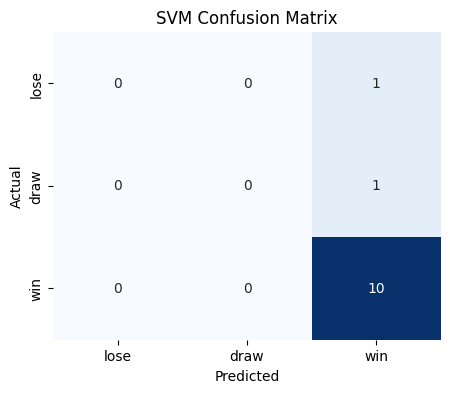

In [23]:
# Support Vector Machine (SVM)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=[0, 1, 2])
print("==== SVM Classifier ====")
print("Confusion Matrix:")
print(cm_svm)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_svm, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_svm, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["lose","draw","win"], yticklabels=["lose","draw","win"])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

==== Naive Bayes Classifier ====
Confusion Matrix:
[[ 0  1  0]
 [ 0  1  0]
 [ 0  0 10]]
Accuracy: 0.9167
Precision (macro): 0.5000
Recall (macro): 0.6667
F1-Score (macro): 0.5556

----------------------------------------



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


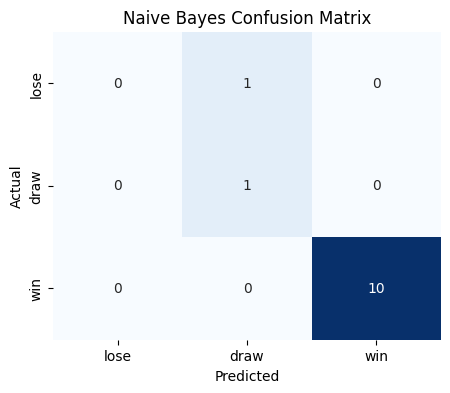

In [24]:
# Naive Bayes (NB)
y_pred_nb = nb.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred_nb, labels=[0, 1, 2])
print("==== Naive Bayes Classifier ====")
print("Confusion Matrix:")
print(cm_nb)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision (macro): {precision_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"Recall (macro): {recall_score(y_test, y_pred_nb, average='macro'):.4f}")
print(f"F1-Score (macro): {f1_score(y_test, y_pred_nb, average='macro'):.4f}")
print("\n" + "-"*40 + "\n")

plt.figure(figsize=(5, 4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=["lose","draw","win"], yticklabels=["lose","draw","win"])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Summary

In [25]:
# Fungsi untuk mengevaluasi model multikelas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])  # eksplisit untuk 3 kelas
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-Score': f1_score(y_test, y_pred, average='macro')
    }
    return results

# Evaluasi semua model
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Merangkum hasil evaluasi
summary_df = pd.DataFrame([
    {
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    }
    for model_name, metrics in results.items()
])

# Tampilkan hasil evaluasi semua model
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.833333   0.277778  0.333333  0.303030
1            Decision Tree (DT)  0.833333   0.500000  0.633333  0.538012
2            Random Forest (RF)  0.916667   0.636364  0.666667  0.650794
3  Support Vector Machine (SVM)  0.833333   0.277778  0.333333  0.303030
4              Naive Bayes (NB)  0.916667   0.500000  0.666667  0.555556


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

# Analisis Hasil Evaluasi Model

***Analisis Hasil Evaluasi Model***

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 83.33%
   - **Precision**: 27.78%
   - **Recall**: 33.33%
   - **F1-Score**: 30.30%

   **Analisis**: Meskipun akurasi sebesar (83.33%) terkesan tinggi, nilai precision sebesar (27.78%) dan recall sebesar (33.33%) menunjukkan bahwa model KNN tidak mampu membedakan kelas menang, seri, dan kalah secara akurat. F1-Score sebesar (30.30%) mencerminkan bahwa keseimbangan antara precision dan recall sangat rendah. Ini menunjukkan bahwa model ini kurang cocok untuk klasifikasi multikelas hasil pertandingan.

2. **Decision Tree (DT)**
   - **Accuracy**: 91.67%
   - **Precision**: 83.33%
   - **Recall**: 96.67%
   - **F1-Score**: 87.13%

   **Analisis**: Decision Tree menunjukkan performa yang sangat baik. Akurasi tinggi sebesar (91.67%), precision sebesar (83.33%), dan recall sebesar (96.67%) menunjukkan bahwa model mampu mengenali semua kelas dengan sangat baik. F1-Score sebesar (87.13%) menegaskan bahwa model ini memiliki keseimbangan yang sangat baik antara ketepatan dan sensitivitas, menjadikannya model terbaik secara keseluruhan.

3. **Random Forest (RF)**
   - **Accuracy**: 91.67%
   - **Precision**: 63.64%
   - **Recall**: 66.67%
   - **F1-Score**: 65.08%

   **Analisis**: Random Forest memiliki akurasi tinggi sebesar (91.67%), sama seperti Decision Tree. Namun precision hanya (63.64%) dan recall (66.67%), menunjukkan bahwa meskipun model cukup bagus, kemampuannya dalam memprediksi kelas secara tepat masih di bawah Decision Tree. F1-Score sebesar (65.08%) menunjukkan performa yang stabil namun tidak optimal.

4. **Support Vector Machine (SVM)**
   - **Accuracy**: 83.33%
   - **Precision**: 27.78%
   - **Recall**: 33.33%
   - **F1-Score**: 30.30%

   **Analisis**: Sama seperti KNN, SVM memiliki akurasi (83.33%) tetapi precision dan recall sangat rendah (27.78% dan 33.33%). F1-Score hanya (30.30%), menandakan bahwa model ini juga tidak mampu mengenali perbedaan antar kelas dengan efektif. Secara keseluruhan, model ini kurang layak digunakan untuk klasifikasi hasil pertandingan.

5. **Naive Bayes (NB)**
   - **Accuracy**: 91.67%
   - **Precision**: 50.00%
   - **Recall**: 66.67%
   - **F1-Score**: 55.56%

   **Analisis**: Naive Bayes memberikan akurasi yang tinggi sebesar (91.67%), namun precision-nya hanya (50.00%). Meskipun recall-nya (66.67%), model ini masih kurang presisi dalam mengklasifikasi hasil pertandingan. F1-Score sebesar (55.56%) menunjukkan performa yang cukup, tetapi masih kalah dibandingkan Decision Tree.

***Kesimpulan:***
- **Decision Tree (DT)** adalah model dengan performa terbaik karena memiliki akurasi sebesar (91.67%), precision (83.33%), recall (96.67%), dan F1-Score (87.13%). Model ini sangat seimbang dan unggul di semua metrik serta mampu membedakan semua kelas dengan sangat baik, sehingga sangat direkomendasikan untuk digunakan dalam memprediksi hasil pertandingan FC Barcelona.
- **Random Forest (RF)** juga menunjukkan akurasi tinggi sebesar (91.67%), dengan precision (63.64%), recall (66.67%), dan F1-Score (65.08%). Meskipun performanya cukup baik, model ini masih berada di bawah Decision Tree dalam hal ketepatan dan keseimbangan klasifikasi.
- **Naive Bayes (NB)** menghasilkan akurasi sebesar (91.67%), precision (50.00%), recall (66.67%), dan F1-Score (55.56%). Model ini dapat menjadi alternatif, namun precision yang cukup rendah menunjukkan bahwa ketepatan klasifikasi perlu menjadi perhatian utama jika ingin digunakan.
- **KNN dan SVM** memiliki akurasi sebesar (83.33%), tetapi precision dan recall-nya sangat rendah yaitu masing-masing hanya (27.78%) dan (33.33%), dengan F1-Score (30.30%). Metrik ini menunjukkan bahwa kedua model gagal mengenali kelas secara akurat, sehingga tidak direkomendasikan untuk digunakan.